<a href="https://colab.research.google.com/github/palakagl/AI-in-Finance/blob/main/Stock_Price_Prediction_LSTM_with_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install yfinance --upgrade --no-cache-dir

In [7]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os


import math
import yfinance as yf

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Get Stock Price, S&P Index, Nasdaq Index price from Yahoo Finance

In [9]:
df_stock = web.DataReader('^NYA', 'yahoo', start='2012-01-01', end='2022-03-20')

df_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,7659.970215,7459.450195,7477.029785,7624.319824,3943710000,7624.319824
2012-01-04,7624.319824,7559.990234,7624.319824,7612.149902,3592580000,7612.149902
2012-01-05,7613.600098,7512.649902,7612.149902,7599.970215,4315950000,7599.970215
2012-01-06,7601.479980,7535.620117,7599.970215,7557.680176,3656830000,7557.680176
2012-01-09,7588.890137,7539.339844,7557.680176,7584.660156,3371600000,7584.660156
...,...,...,...,...,...,...
2022-03-14,15917.929688,15635.769531,15753.700195,15694.349609,4757600000,15694.349609
2022-03-15,15914.929688,15694.349609,15694.349609,15895.669922,4331170000,15895.669922
2022-03-16,16262.549805,15895.669922,15895.669922,16261.500000,5002240000,16261.500000


Text(0, 0.5, 'Stock Price ($)')

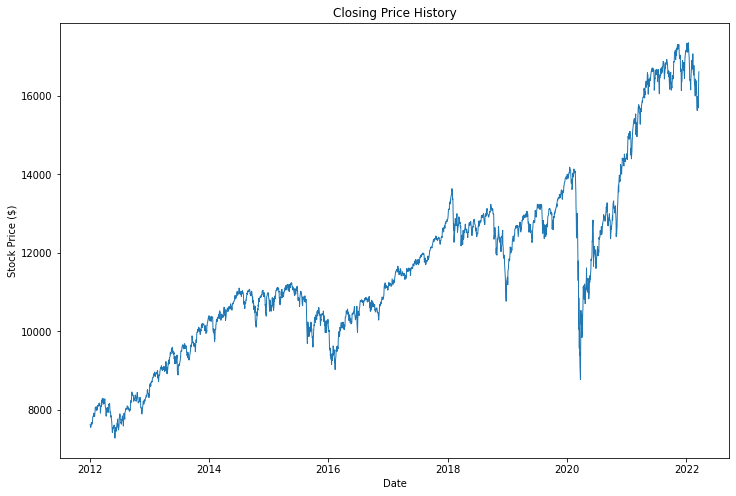

In [10]:
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df_stock['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [11]:
df_snp = web.DataReader('^GSPC', 'yahoo', start='2012-01-01', end='2022-03-20')

df_snp

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2022-03-14,4247.569824,4161.720215,4202.750000,4173.109863,4757600000,4173.109863
2022-03-15,4271.049805,4187.899902,4188.819824,4262.450195,4331170000,4262.450195
2022-03-16,4358.899902,4251.990234,4288.140137,4357.859863,5002240000,4357.859863


Text(0, 0.5, 'Stock Price ($)')

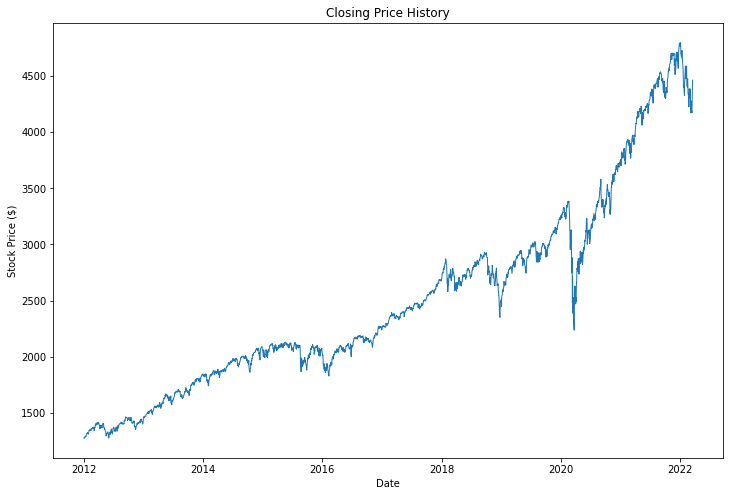

In [12]:
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df_snp['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [13]:
df_nasdaq = web.DataReader('^IXIC', 'yahoo', start='2012-01-01', end='2022-03-20')

df_nasdaq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,2665.899902,2641.979980,2657.389893,2648.719971,1636850000,2648.719971
2012-01-04,2653.179932,2627.229980,2639.899902,2648.360107,1670530000,2648.360107
2012-01-05,2673.560059,2631.229980,2642.570068,2669.860107,1836410000,2669.860107
2012-01-06,2682.120117,2658.830078,2671.169922,2674.219971,1683090000,2674.219971
2012-01-09,2683.780029,2662.959961,2682.979980,2676.560059,1768080000,2676.560059
...,...,...,...,...,...,...
2022-03-14,12918.009766,12555.349609,12795.120117,12581.219727,5853360000,12581.219727
2022-03-15,12973.879883,12616.589844,12685.230469,12948.620117,5414590000,12948.620117
2022-03-16,13440.120117,12992.200195,13119.370117,13436.549805,6498110000,13436.549805


Text(0, 0.5, 'Stock Price ($)')

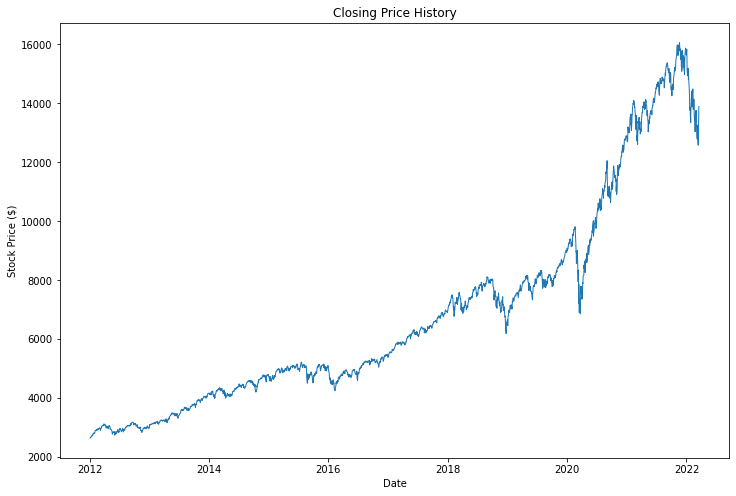

In [14]:
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df_nasdaq['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [15]:
df = df_stock.filter(['Close'])
df['Close_Stock'] = df_stock.filter(['Close'])
df = df.drop('Close', axis=1)
df['CLose_S&P'] = df_snp.filter(['Close'])
df['CLose_Nasdaq'] = df_nasdaq.filter(['Close'])
df

,Close_Stock,CLose_S&P,CLose_Nasdaq
Date,,,
2012-01-03,7624.319824,1277.060059,2648.719971
2012-01-04,7612.149902,1277.300049,2648.360107
2012-01-05,7599.970215,1281.060059,2669.860107
2012-01-06,7557.680176,1277.810059,2674.219971
2012-01-09,7584.660156,1280.699951,2676.560059
...,...,...,...
2022-03-14,15694.349609,4173.109863,12581.219727
2022-03-15,15895.669922,4262.450195,12948.620117
2022-03-16,16261.500000,4357.859863,13436.549805


In [16]:
df.shape[0]

2570

Transform the Data

In [17]:
X0=[]
X1=[]
X2=[]
y=[]

look_back = 60

for i in range (0, df.shape[0]-look_back):
    X0.append(df.iloc[i:i + look_back, 0])
    X1.append(df.iloc[i:i + look_back, 1])
    X2.append(df.iloc[i:i + look_back, 2])
    y.append(df.iloc[i + look_back, 0])


In [18]:
type(X2)

list

In [19]:
df.head(5)

,Close_Stock,CLose_S&P,CLose_Nasdaq
Date,,,
2012-01-03,7624.319824,1277.060059,2648.719971
2012-01-04,7612.149902,1277.300049,2648.360107
2012-01-05,7599.970215,1281.060059,2669.860107
2012-01-06,7557.680176,1277.810059,2674.219971
2012-01-09,7584.660156,1280.699951,2676.560059


In [20]:
X0, X1, X2, y = np.array(X0), np.array(X1), np.array(X2), np.array(y)

In [21]:
X1.shape

(2510, 60)

In [22]:
y.shape

(2510,)

In [23]:
y=np.reshape(y,(len(y),-1))

In [24]:
y.shape

(2510, 1)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
y = scaler.fit_transform(y)

In [26]:
X=np.stack((X0,X1,X2), axis=2)
X

array([[[3.37945851e-02, 0.00000000e+00, 2.68372828e-05],
        [3.25806254e-02, 0.00000000e+00, 0.00000000e+00],
        [3.13656915e-02, 9.42580879e-04, 0.00000000e+00],
        ...,
        [9.96451700e-02, 3.93546065e-02, 2.81811572e-02],
        [9.47336617e-02, 3.82206097e-02, 2.80143670e-02],
        [8.96702116e-02, 3.62368266e-02, 2.68580798e-02]],

       [[3.25806254e-02, 6.98669670e-05, 0.00000000e+00],
        [3.13656915e-02, 1.09470635e-03, 1.60339110e-03],
        [2.71472253e-02, 0.00000000e+00, 3.25664771e-04],
        ...,
        [9.47336617e-02, 3.82206097e-02, 2.80143670e-02],
        [8.96702116e-02, 3.62368266e-02, 2.68580798e-02],
        [8.74871088e-02, 3.55945084e-02, 2.61368265e-02]],

       [[3.13656915e-02, 1.16449683e-03, 1.60339110e-03],
        [2.71472253e-02, 1.48486564e-04, 1.92853370e-03],
        [2.98385006e-02, 8.38140765e-04, 5.00460203e-04],
        ...,
        [8.96702116e-02, 3.62368266e-02, 2.68580798e-02],
        [8.74871088e-02, 3.55

In [27]:
X.shape

(2510, 60, 3)

In [28]:
X_train, X_test = X[:-514], X[-514:]
y_train, y_test = y[:-514], y[-514:]
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(1996, 60, 3)

In [29]:
model = Sequential()
# set return requesnce = true, if we are going to have another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [31]:
filepath = 'models/{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]

In [32]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=callbacks, batch_size=16)

Epoch 1/10
100/100 [==============================] - 20s 116ms/step - loss: 0.0200 - mae: 0.1091 - val_loss: 0.0312 - val_mae: 0.1688
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.0097 - mae: 0.0763 - val_loss: 0.0259 - val_mae: 0.1538
Epoch 3/10
100/100 [==============================] - 5s 53ms/step - loss: 0.0072 - mae: 0.0661 - val_loss: 0.0167 - val_mae: 0.1218
Epoch 4/10
100/100 [==============================] - 5s 53ms/step - loss: 0.0052 - mae: 0.0560 - val_loss: 0.0108 - val_mae: 0.0965
Epoch 5/10
100/100 [==============================] - 5s 53ms/step - loss: 0.0033 - mae: 0.0455 - val_loss: 0.0059 - val_mae: 0.0695
Epoch 6/10
100/100 [==============================] - 5s 54ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0031 - val_mae: 0.0486
Epoch 7/10
100/100 [==============================] - 5s 55ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0017 - val_mae: 0.0355
Epoch 8/10
100/100 [==============================] - 5s 54ms/step 

In [33]:
MSE, MAE = model.evaluate(X_test, y_test)
print(MSE, MAE)

17/17 [==============================] - 1s 17ms/step - loss: 0.0161 - mae: 0.1124
0.016075706109404564 0.11240160465240479


In [34]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[13415.845 ],
       [13373.422 ],
       [13312.259 ],
       [13248.745 ],
       [13175.231 ],
       [13075.622 ],
       [12976.997 ],
       [12854.011 ],
       [12730.711 ],
       [12590.81  ],
       [12446.703 ],
       [12297.703 ],
       [12142.623 ],
       [12005.446 ],
       [11888.307 ],
       [11804.071 ],
       [11737.184 ],
       [11690.775 ],
       [11656.361 ],
       [11619.429 ],
       [11588.179 ],
       [11557.661 ],
       [11542.976 ],
       [11539.433 ],
       [11551.795 ],
       [11579.239 ],
       [11612.7295],
       [11655.199 ],
       [11696.044 ],
       [11735.191 ],
       [11780.032 ],
       [11822.666 ],
       [11856.691 ],
       [11888.852 ],
       [11918.6875],
       [11948.551 ],
       [11982.197 ],
       [12017.865 ],
       [12060.144 ],
       [12101.213 ],
       [12134.075 ],
       [12161.056 ],
       [12184.9375],
       [12203.577 ],
       [12220.82  ],
       [12241.191 ],
       [12262.089 ],
       [12278

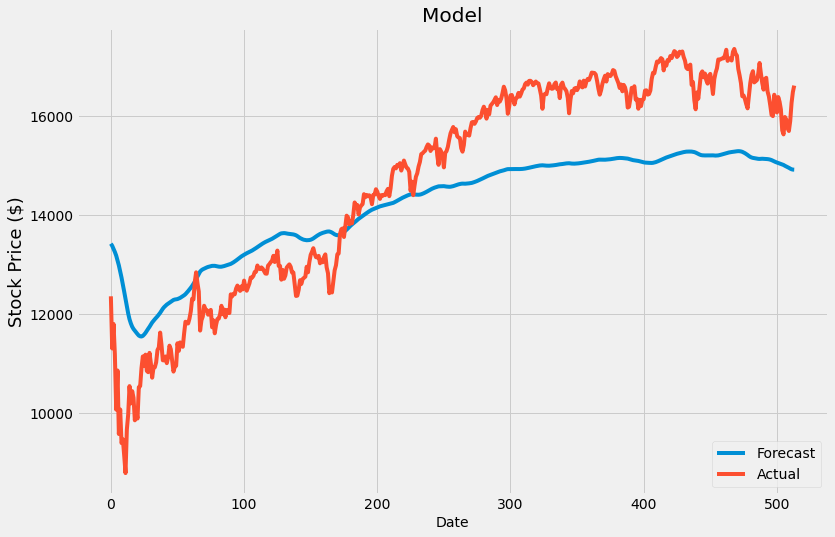

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=18)
plt.plot(predictions)
plt.plot(scaler.inverse_transform(y_test))
plt.legend(['Forecast', 'Actual'],loc='lower right')
plt.show()